In [1]:
import numpy as np
import os
from fine_tune_model import define_classifier_for_classification_for_response
from validation_method import stratified_5_fold_classification, nested_cross_validation_classification, loocv_classification
from utils_simple_prediction import add_task_change_data, load_data_for_classification, add_cgi, add_mddr, set_path, load_task_change_data, save_model_seed
import time
import pandas as pd
set_path()

Current system is Ubuntu


In [2]:
"""

result[model][modality][...]


"""
models = ['Naive Bayes', 'Discriminant Analysis(LDA)', 'Random Forest', 'XGBoost', 'SVM', 'SGDClassifier']#['Discriminant Analysis(LDA)', 'Naive Bayes'] #  'KNN', 'MLP',  , 'Discriminant Analysis(QDA)'
modalities = ['fnirs_modality_classification', 'clinical_data_and_fnirs_modality_classification', 'clinical_data_modality_classification'] # ['fnirs_modality_classification'] # 
modalities_to_name = {
    'clinical_data_modality_classification': 'Tier 1', 
    'fnirs_modality_classification': 'Tier 2', 
    'clinical_data_and_fnirs_modality_classification': 'Tier 3'

}
main_fold = 'results/ML_results/simple_prediction_response/'


auc_result = result = {model: {modality: {} for modality in modalities} for model in models}
metrics = ['auc', 'acc', 'sen', 'spe']

In [3]:

# mean result

def print_models_performance(calculated_result):
    for model in models:
        for modality in modalities:
            result_pth = main_fold + modality + '/' + model + '.csv'
            df = pd.read_csv(result_pth)
            if calculated_result == 'mean':
                mean_values = df.mean()
            elif calculated_result == 'std':
                mean_values = df.std()
            else:
                raise ValueError('calculated_result should be mean or std')
            mean_dict = mean_values.to_dict()
            # print(mean_dict)
            result[model][modality] = mean_dict

    nested_flag = 'validation'  # 'external'
    metrics = ['auc', 'acc', 'sen', 'spe']
    name_of_metrics = ['AUC', 'bAcc', 'Sen', 'Spe']
    for i in range(len(modalities)):
        if i == 0:
            print('| ', end='')
        print(f"| {modalities_to_name[modalities[i]]} | | | ", end='')
    print('|')
    print("|" + " --- |" * (len(modalities) * len(name_of_metrics) + 1))
    print('| ', end='')
    for i in range(len(modalities)):
        for metric in metrics:
            print(f"| {name_of_metrics[metrics.index(metric)]} ", end='')
    print('|')

    print('| External LOOCV' + '| ' * (len(metrics) * len(modalities) + 1))

    for nested_flag in ['test', 'validation']:
        for model in models:
            print(f"| {model} ", end='')
            for modality in modalities:
                # modality_name = modalities_to_name[modality]
                for metric in metrics:
                    val = result[model][modality][nested_flag + '_' + metric]
                    print(f"| {val:.3f} ", end='')

            print('|')
        print('| Inner Straified 5-fold CV' + '| ' *
              (len(metrics) * len(modalities) + 1))

print_models_performance(calculated_result='mean')


print_models_performance(calculated_result='std')

| | Tier 2 | | | | Tier 3 | | | | Tier 1 | | | |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| | AUC | bAcc | Sen | Spe | AUC | bAcc | Sen | Spe | AUC | bAcc | Sen | Spe |
| External LOOCV| | | | | | | | | | | | | 
| Naive Bayes | 0.767 | 0.726 | 0.706 | 0.746 | 0.697 | 0.675 | 0.603 | 0.746 | 0.507 | 0.517 | 0.115 | 0.918 |
| Discriminant Analysis(LDA) | 0.707 | 0.658 | 0.648 | 0.668 | 0.537 | 0.518 | 0.388 | 0.647 | 0.405 | 0.476 | 0.343 | 0.609 |
| Random Forest | 0.692 | 0.615 | 0.545 | 0.686 | 0.658 | 0.614 | 0.615 | 0.612 | 0.381 | 0.497 | 0.731 | 0.263 |
| XGBoost | 0.634 | 0.576 | 0.587 | 0.566 | 0.595 | 0.543 | 0.599 | 0.487 | 0.416 | 0.448 | 0.728 | 0.167 |
| SVM | 0.629 | 0.698 | 0.769 | 0.627 | 0.282 | 0.502 | 0.797 | 0.207 | 0.291 | 0.491 | 0.803 | 0.178 |
| SGDClassifier | 0.660 | 0.643 | 0.695 | 0.591 | 0.150 | 0.454 | 0.748 | 0.160 | 0.089 | 0.463 | 0.841 | 0.085 |
| Inner Straified 5-fold CV| | | | | | | | | | | | | 
| Naive Bayes | 

In [4]:
import json
for model in models:
    for modality in modalities:
        result_pth = main_fold + modality + '/' + model + '_pred.json'
        print(result_pth)
        with open(result_pth, 'r') as json_file:
            data = json.load(json_file)
            auc_result[model][modality] = data

results/ML_results/simple_prediction_response/fnirs_modality_classification/Naive Bayes_pred.json
results/ML_results/simple_prediction_response/clinical_data_and_fnirs_modality_classification/Naive Bayes_pred.json
results/ML_results/simple_prediction_response/clinical_data_modality_classification/Naive Bayes_pred.json
results/ML_results/simple_prediction_response/fnirs_modality_classification/Discriminant Analysis(LDA)_pred.json
results/ML_results/simple_prediction_response/clinical_data_and_fnirs_modality_classification/Discriminant Analysis(LDA)_pred.json
results/ML_results/simple_prediction_response/clinical_data_modality_classification/Discriminant Analysis(LDA)_pred.json
results/ML_results/simple_prediction_response/fnirs_modality_classification/Random Forest_pred.json
results/ML_results/simple_prediction_response/clinical_data_and_fnirs_modality_classification/Random Forest_pred.json
results/ML_results/simple_prediction_response/clinical_data_modality_classification/Random Forest

0
1
2
3
4
5


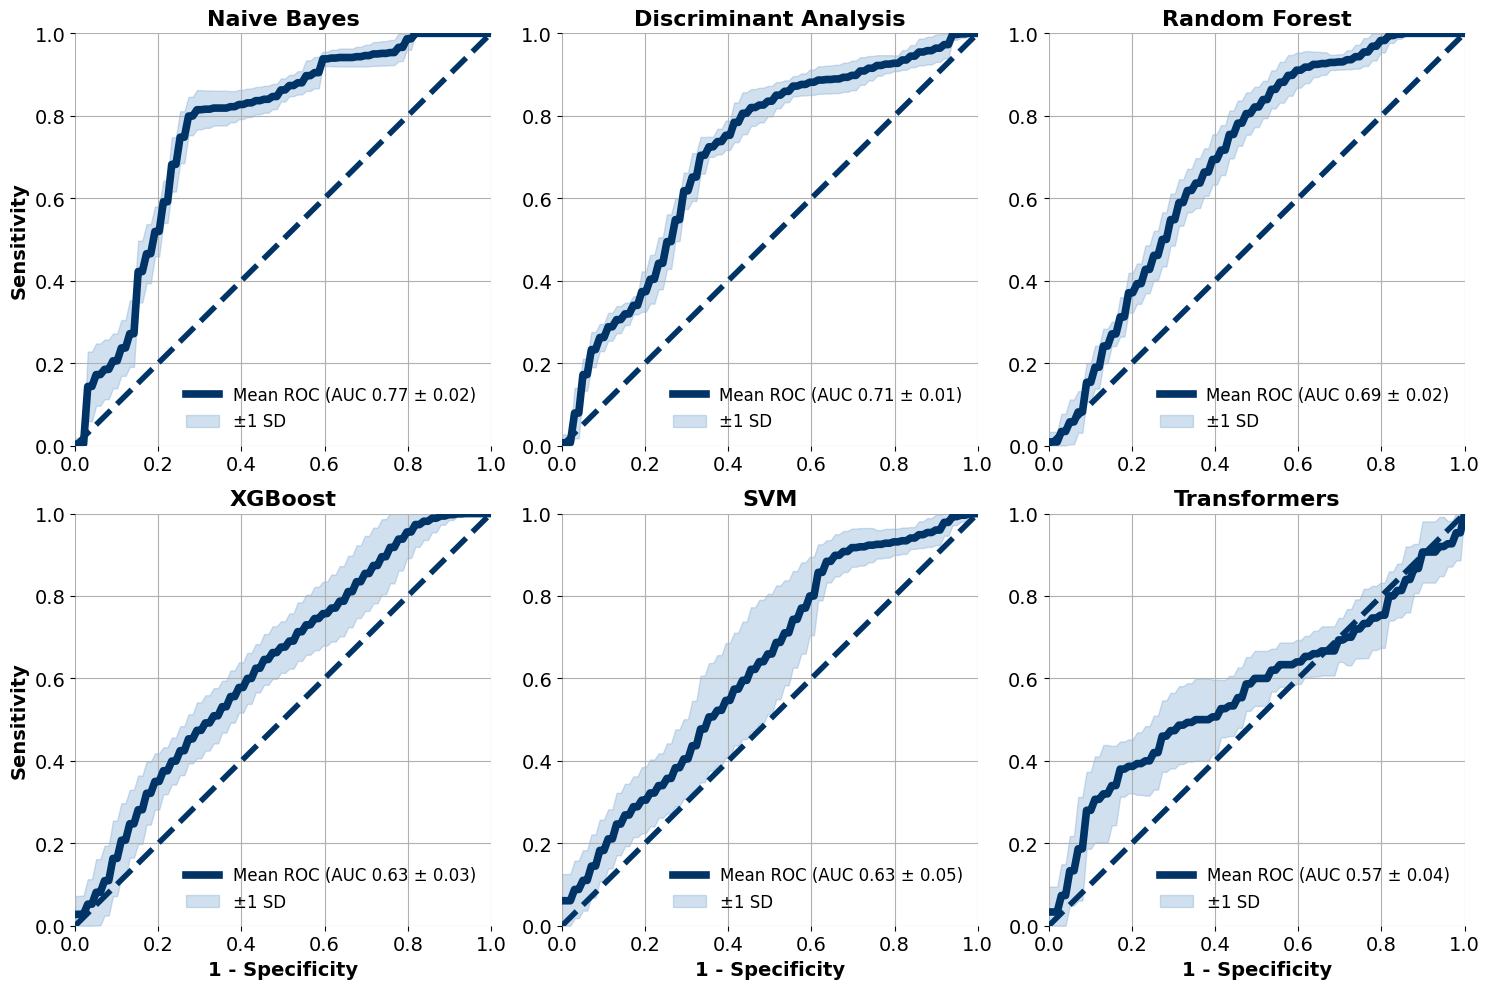

In [5]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
fontsize = 14
MMDR_path = 'results/gnn_transformer/prognosis_mix_hb/pretreatment_response/ten-fold-evaluate/y_pred_test_all.npy'

# '#003366', '#336699',
def plot_avg_auc(fprs, tprs, roc_aucs, title, ax=None, fontsize=14):
    mean_fpr = np.linspace(0, 1, 100)

    # Interpolate TPRs at these common FPR levels
    tpr_interpolated = [np.interp(mean_fpr, fprs[i], tprs[i]) for i in range(len(fprs))]
        
    # Calculate the mean and std TPR
    tpr_interpolated = np.array(tpr_interpolated)
    mean_tpr = tpr_interpolated.mean(axis=0)
    std_tpr = tpr_interpolated.std(axis=0)

    tpr_upper = np.minimum(mean_tpr + std_tpr, 1)
    tpr_lower = np.maximum(mean_tpr - std_tpr, 0)

    # Compute AUC
    mean_auc = np.mean(roc_aucs)
    std_auc = np.std(roc_aucs)
    
    if ax is None:
        fig, ax = plt.subplots()

    ax.plot(mean_fpr, mean_tpr, lw=5.5, color='#003366', label='Mean ROC (AUC %0.2f ± %0.2f)' % (mean_auc, std_auc))
    ax.fill_between(mean_fpr, tpr_lower, tpr_upper, color='#6699CC', alpha=0.3, label='±1 SD')
    ax.plot([0, 1], [0, 1], color='#003366', lw=4, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.tick_params(axis='y', labelsize=fontsize)  # Set the desired font size
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.grid()
    
    ax.set_ylabel('Sensitivity', fontweight='bold', fontsize=fontsize)
    
    # change the title of Discriminant Analysis(LDA) to Discriminant Analysis
    if title[-5:] == '(LDA)':
        title = 'Discriminant Analysis'
        
    ax.set_title(title, fontweight='bold', fontsize=fontsize+2)
    ax.legend(loc="lower right", frameon=False, fontsize=fontsize-2)

    for spine in ax.spines.values():
        spine.set_visible(False)

    if ax is None:
        plt.show()
                
count = 0
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for count, model in enumerate(models):
    print(count)
    ax = axs[count//3, count%3]
    fprs, tprs, roc_aucs = [], [], []

    if model == 'SGDClassifier':
        model = 'Transformers'
        MMDR_path = 'results/gnn_transformer_with_cli_demo_v1/prognosis_mix_hb/pretreatment_response/ten-fold-evaluate/y_pred_test_all.npy'
        label_path = 'allData/prognosis_mix_hb/pretreatment_response/label.npy'
        data = np.load(MMDR_path)
        y_true = np.load(label_path)
        for i in range(data.shape[0]):
            y_pred = data[i,:,1]
            fpr, tpr, _ = roc_curve(y_true, y_pred)
            fprs.append(fpr)
            tprs.append(tpr)
            roc_auc = auc(fpr, tpr)
            roc_aucs.append(roc_auc)
    else:
        for key, value in auc_result[model]['fnirs_modality_classification'].items():
            y_pred = value['y_pred']
            y_true = value['y_pred_prob'] if value.get('y_pred_prob') is not None else value['y_true']
            fpr, tpr, _ = roc_curve(y_true, y_pred)
            fprs.append(fpr)
            tprs.append(tpr)
            roc_auc = auc(fpr, tpr)
            roc_aucs.append(roc_auc)

    plot_avg_auc(fprs, tprs, roc_aucs, model, ax)
    if (count // 3) == 1:
        ax.set_xlabel('1 - Specificity', fontweight='bold', fontsize=fontsize)

    if count % 3 != 0:
        ax.set_ylabel('')
        
    plt.tight_layout()



In [6]:
shap_all = {modality: {} for modality in modalities}

for modality in modalities:
    for count, model in enumerate(models):
        model_shap = []
        for key, value in auc_result[model][modality].items():
            shap = np.array(value['shap'])
            model_shap.append(shap)
        shap_all[modality][model] = model_shap

fnirs_modality_classification Naive Bayes
fnirs_modality_classification Discriminant Analysis(LDA)
fnirs_modality_classification Random Forest
fnirs_modality_classification XGBoost
fnirs_modality_classification SVM
fnirs_modality_classification SGDClassifier
clinical_data_and_fnirs_modality_classification Naive Bayes
clinical_data_and_fnirs_modality_classification Discriminant Analysis(LDA)
clinical_data_and_fnirs_modality_classification Random Forest
clinical_data_and_fnirs_modality_classification XGBoost
clinical_data_and_fnirs_modality_classification SVM
clinical_data_and_fnirs_modality_classification SGDClassifier
clinical_data_modality_classification Naive Bayes
clinical_data_modality_classification Discriminant Analysis(LDA)
clinical_data_modality_classification Random Forest
clinical_data_modality_classification XGBoost
clinical_data_modality_classification SVM
clinical_data_modality_classification SGDClassifier


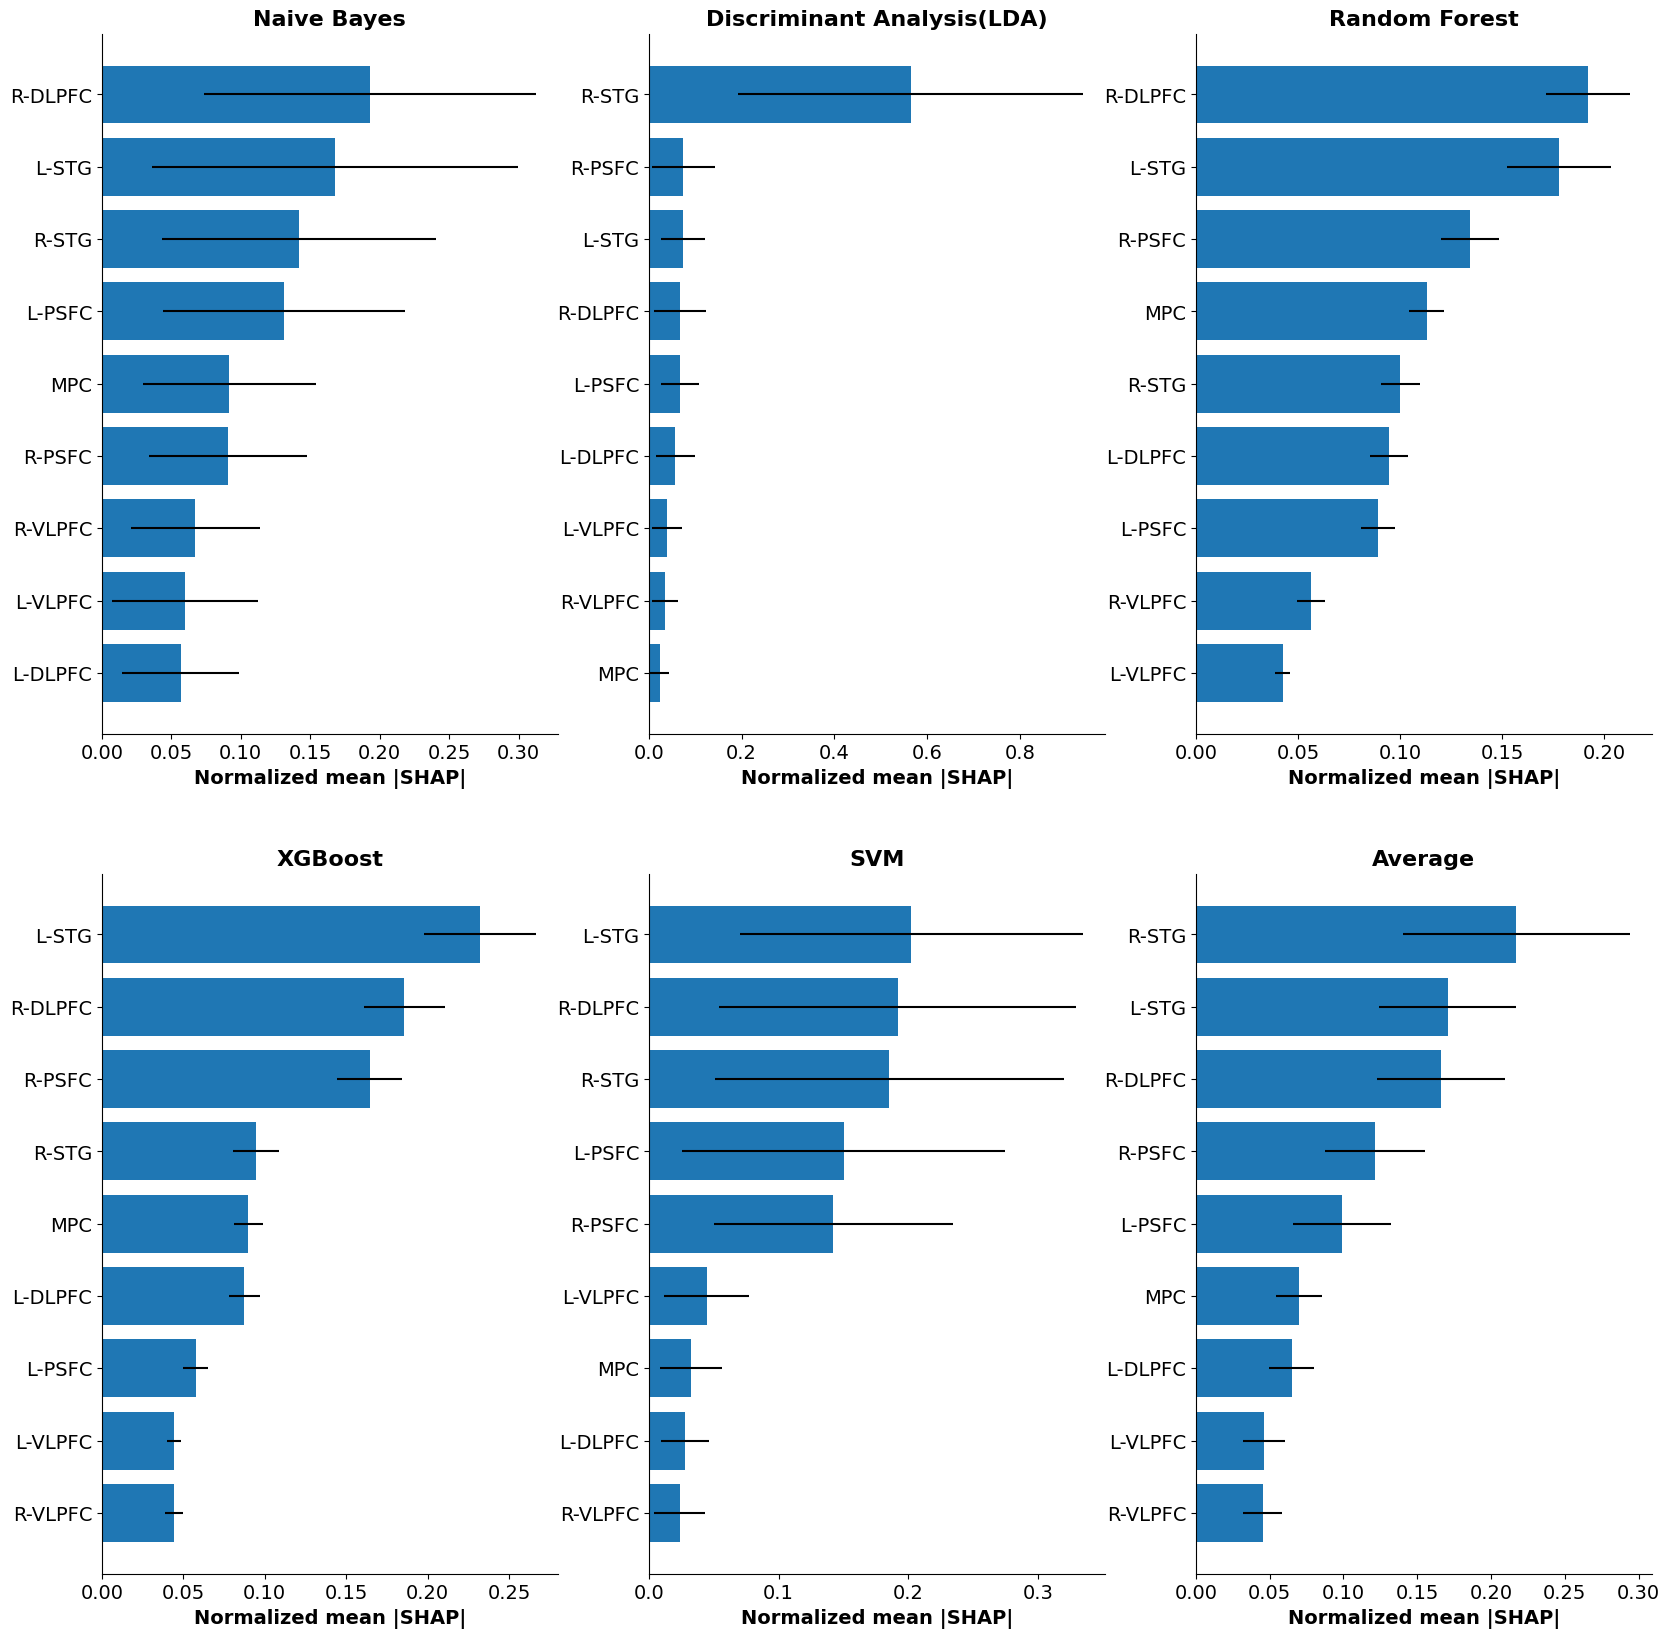

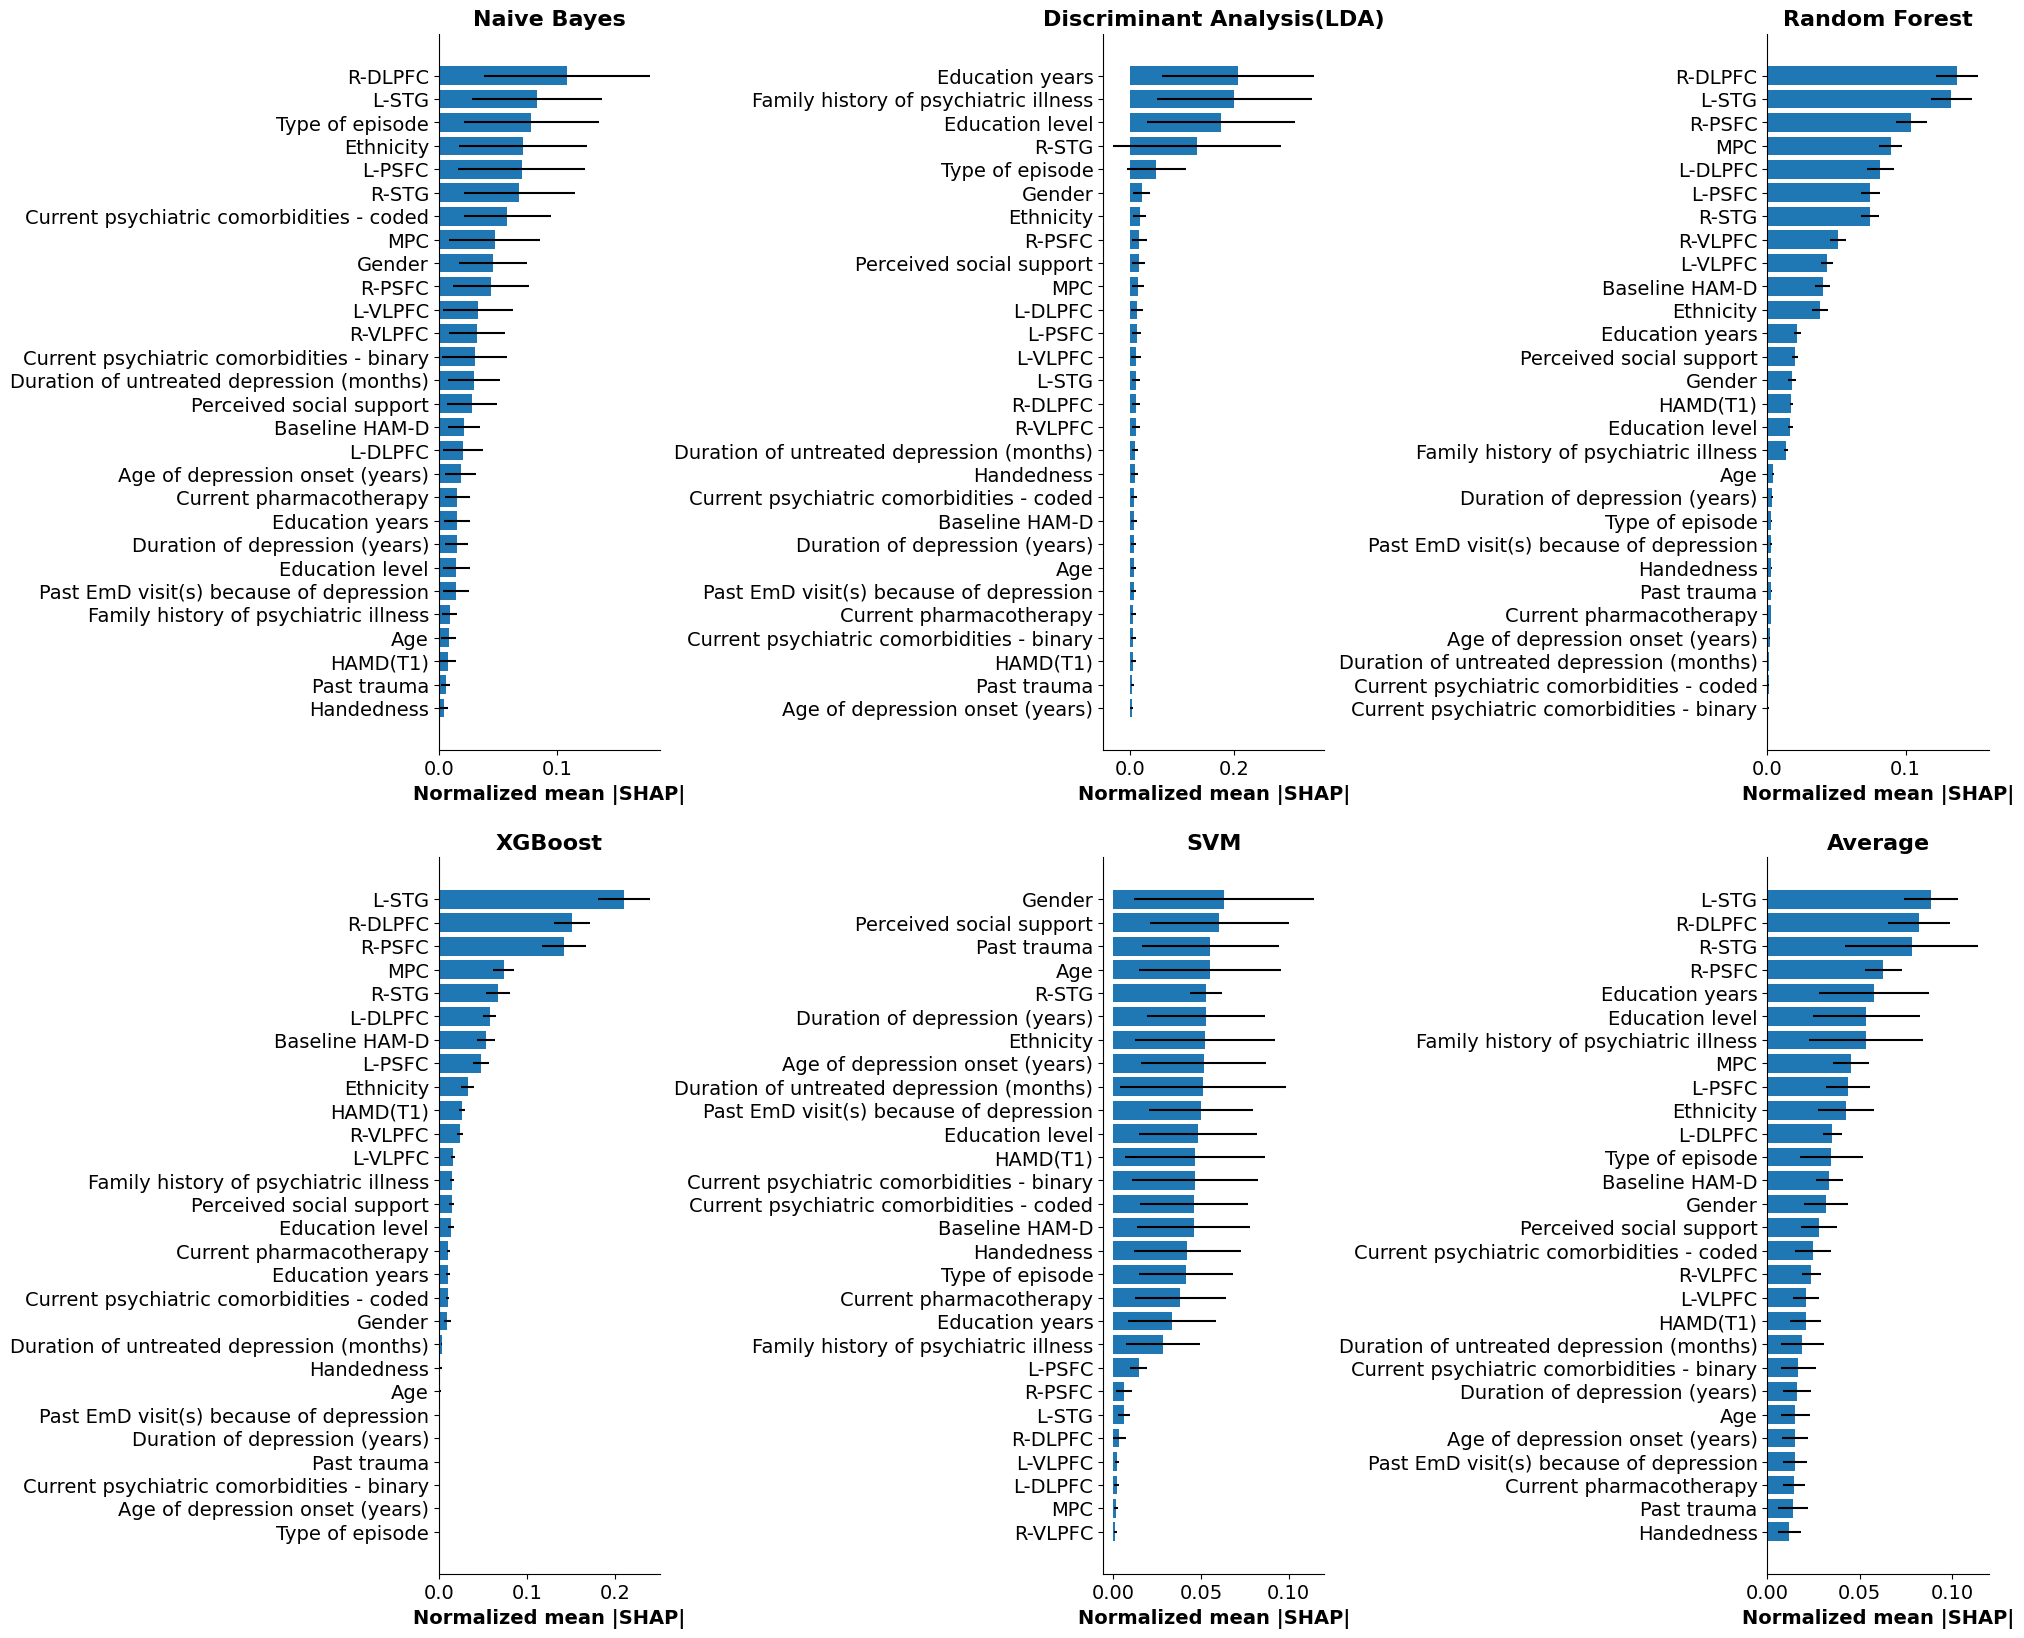

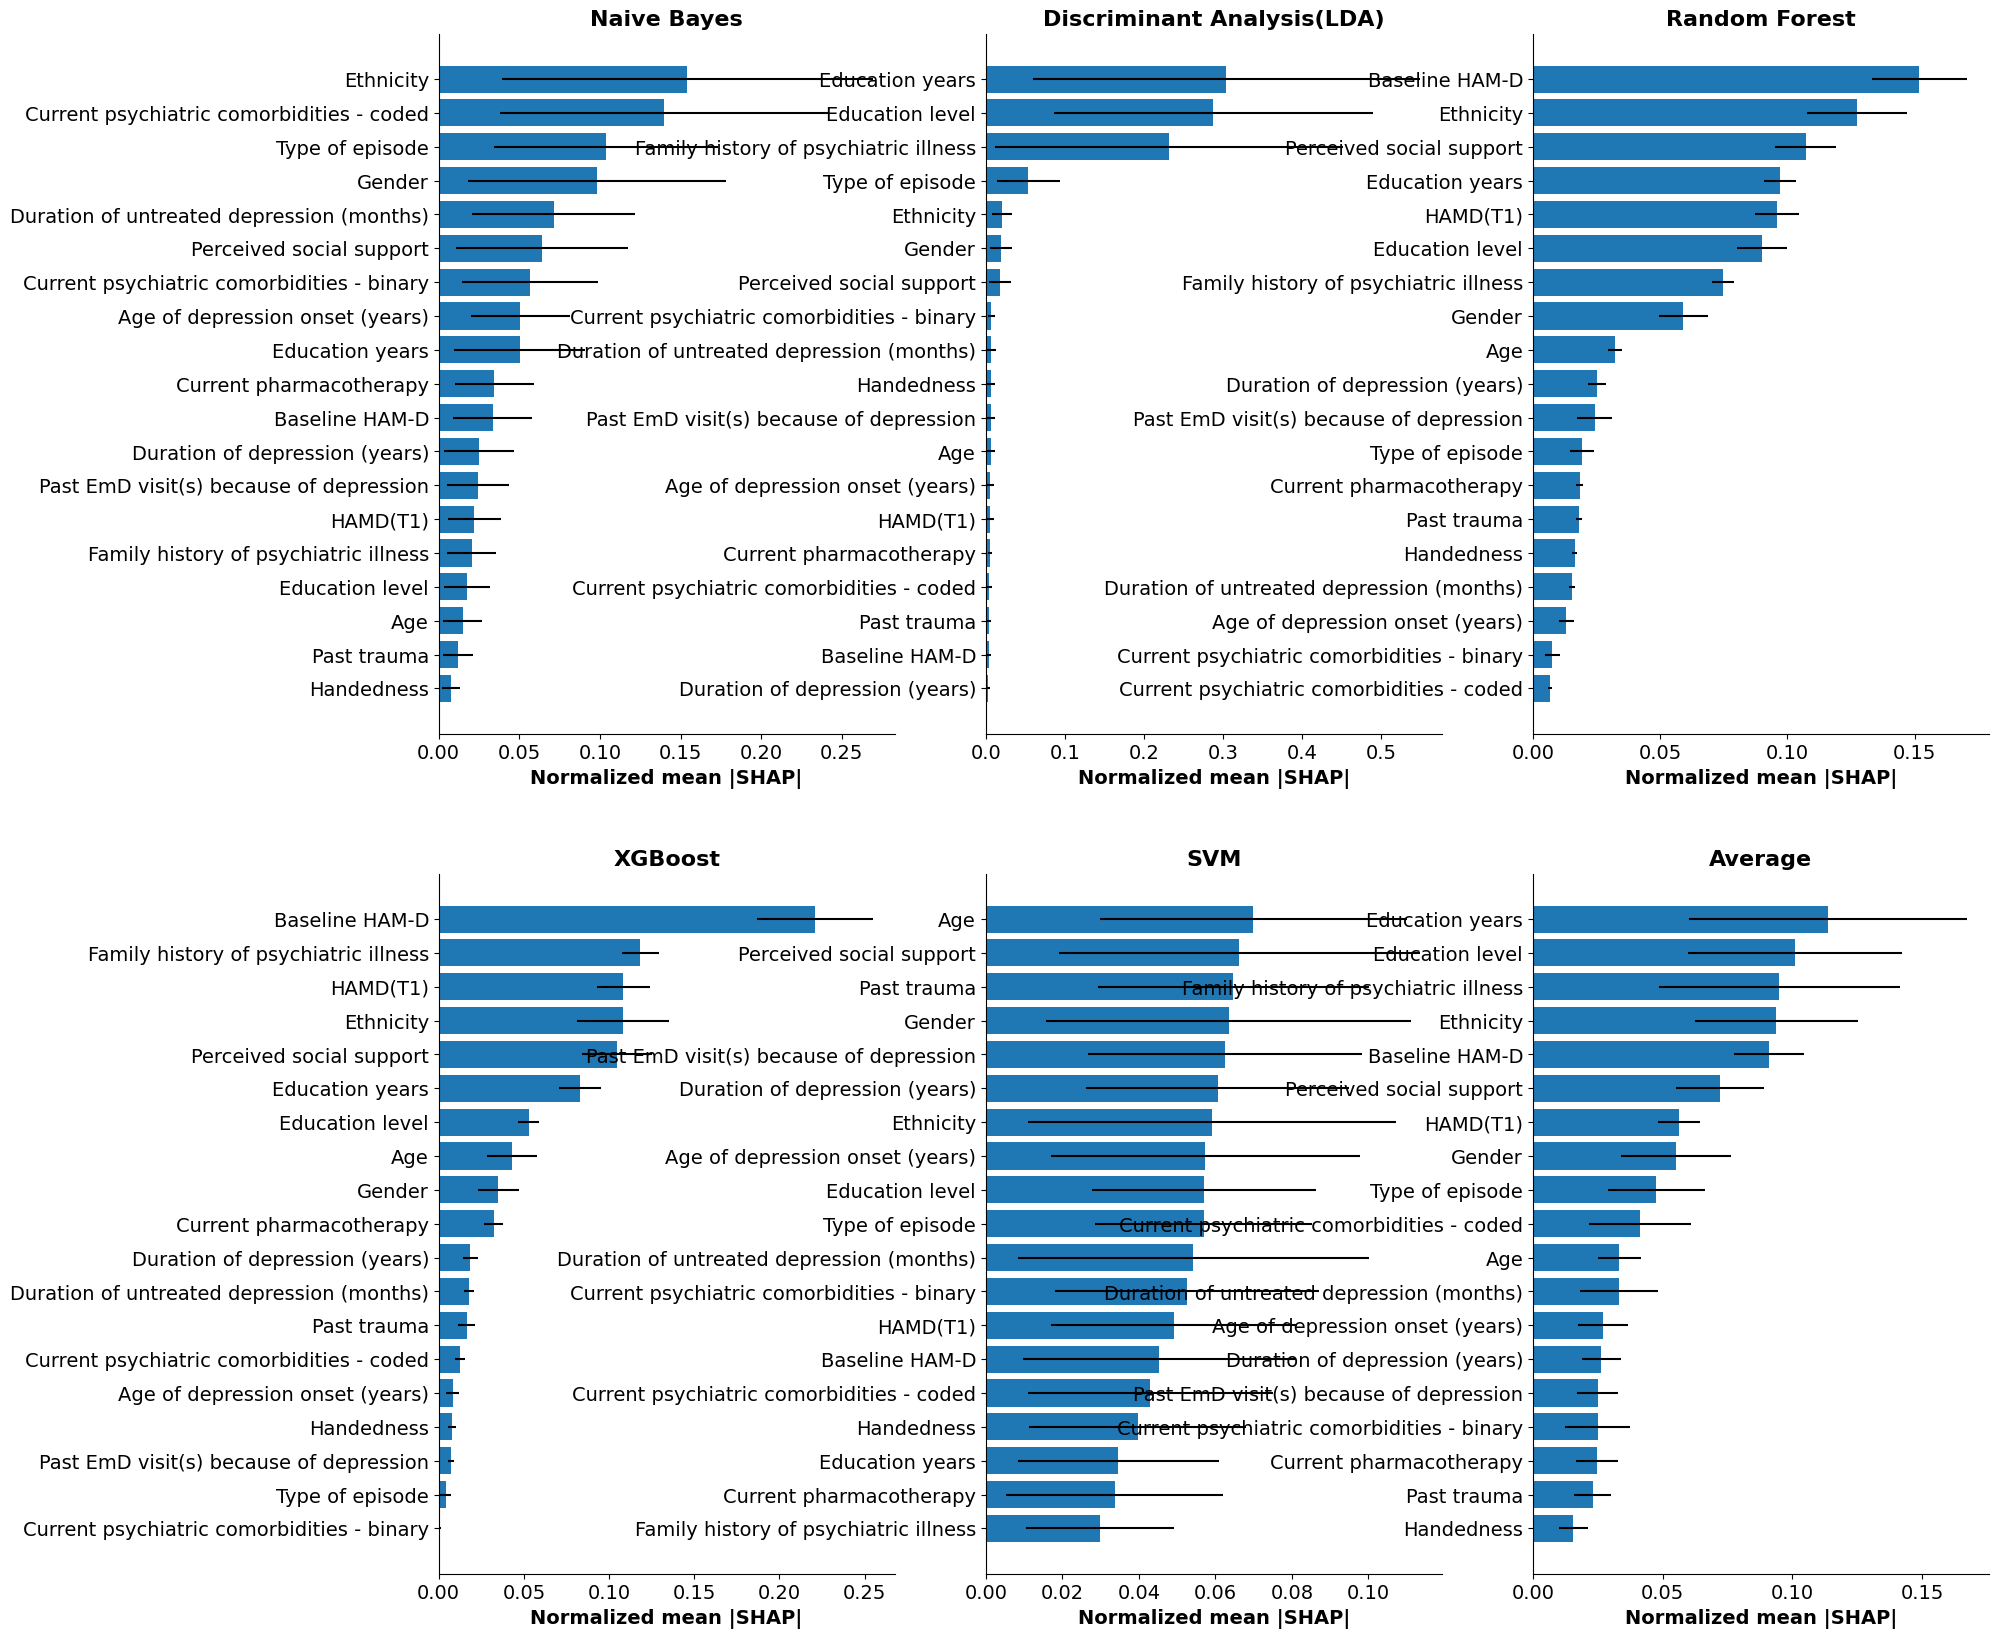

In [44]:
import shap

psychiatric_history_name = ['Past trauma', 
                        'Current psychiatric comorbidities - binary', 
                        'Current psychiatric comorbidities - coded',
                        'Family history of psychiatric illness',
                        'Age of depression onset (years)',
                        'Duration of depression (years)',
                        'Duration of untreated depression (months)',
                        'Past EmD visit(s) because of depression',
                        'Type of episode',
                        'Current pharmacotherapy',
                        'Baseline HAM-D']
demographic_name = ['Age', 'Gender', 'Ethnicity', 'Handedness', 'Education years', 'Education level', 'Perceived social support']


clinical_input_name = demographic_name+psychiatric_history_name+['HAMD(T1)'] # 'dose', 
fnirs_input_name = ['L-PSFC', 'R-PSFC', 'L-DLPFC', 'R-DLPFC', 'L-STG', 'R-STG', 'L-VLPFC', 'R-VLPFC', 'MPC']

name_dict_for_modalities = {
    'fnirs_modality_classification': fnirs_input_name,
    'clinical_data_modality_classification': clinical_input_name,
    'clinical_data_and_fnirs_modality_classification': clinical_input_name + fnirs_input_name
    
}


def plot_rank_feature_importance(abs_shap_means, x_input_name, ax, model_name, fontsize=14):

    mean_abs_shap_means = np.mean(abs_shap_means, axis=0)
    rank_idx = np.argsort(mean_abs_shap_means)
    ranked_x_input_name = [x_input_name[i] for i in rank_idx]

    ranked_mean_abs_shap_means = mean_abs_shap_means[rank_idx]
    ranked_std_abs_shap_means = np.std(abs_shap_means, axis=0)[rank_idx]
    ranked_x_input_name = [x_input_name[i] for i in rank_idx]
    ax.barh(ranked_x_input_name, ranked_mean_abs_shap_means, xerr=ranked_std_abs_shap_means)
    
    ax.tick_params(axis='y', labelsize=fontsize)  # Set the desired font size
    ax.tick_params(axis='x', labelsize=fontsize)  # Set the desired font size
    ax.set_xlabel('Normalized mean |SHAP|', fontweight='bold', fontsize=fontsize)
    ax.set_title(model_name, fontweight='bold', fontsize=fontsize+2)    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # plt.barh(x_input_name, np.mean(abs_shap_means, axis=0), xerr=np.std(abs_shap_means, axis=0))
    
for modality in modalities:    
    fig, axs = plt.subplots(2, 3, figsize=(20, 20))

    all_models_shap_mean = []
    for count, model_name in enumerate(models):

        ax = axs[count//3, count%3]
        print(modality, model_name)
        shape_values = np.array(shap_all[modality][model_name])
        # print('shape_values.shape[1]', shape_values.shape[2])
        x_input_name = [name_dict_for_modalities[modality][i] for i in range(shape_values.shape[2])]
        shap_means = np.mean(shape_values, axis=0)
        abs_shap_means = np.abs(shap_means)
        sum_value = np.sum(abs_shap_means)
        abs_shap_means = abs_shap_means / sum_value * 64
        
        
        
        if model_name == 'SGDClassifier':
            assert len(all_models_shap_mean) == 5
            abs_shap_means = np.mean(np.array(all_models_shap_mean), axis=0)
            model_name = 'Average'
            # ax.clear()
            # ax.axis('off')
            # continue
        else:
            all_models_shap_mean.append(abs_shap_means)
        plot_rank_feature_importance(abs_shap_means, x_input_name, ax, model_name)

        
        if modality == 'clinical_data_and_fnirs_modality_classification':
            plt.subplots_adjust(wspace=2, hspace=0.15)
            
    # plt.show()
    


In [62]:


len(a)

18

(13, 64, 9)


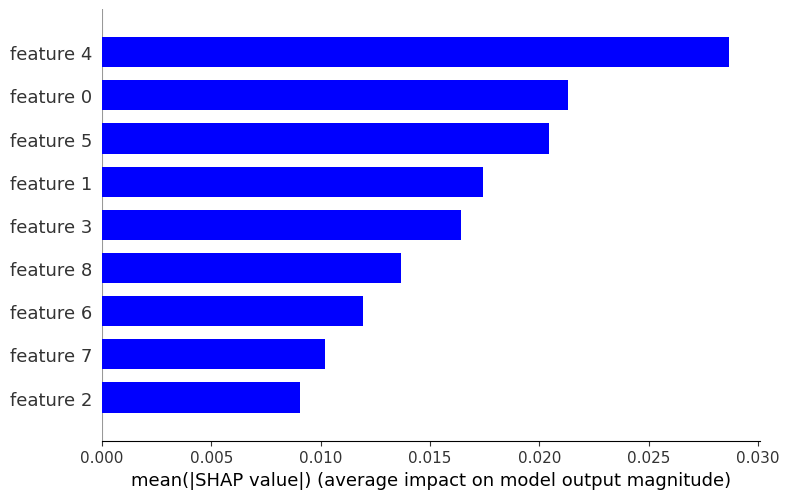

(13, 64, 9)


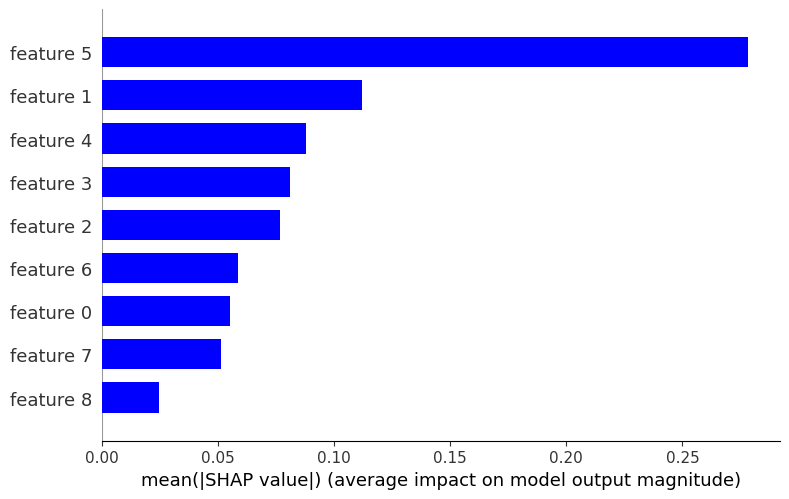

(13, 64, 9)


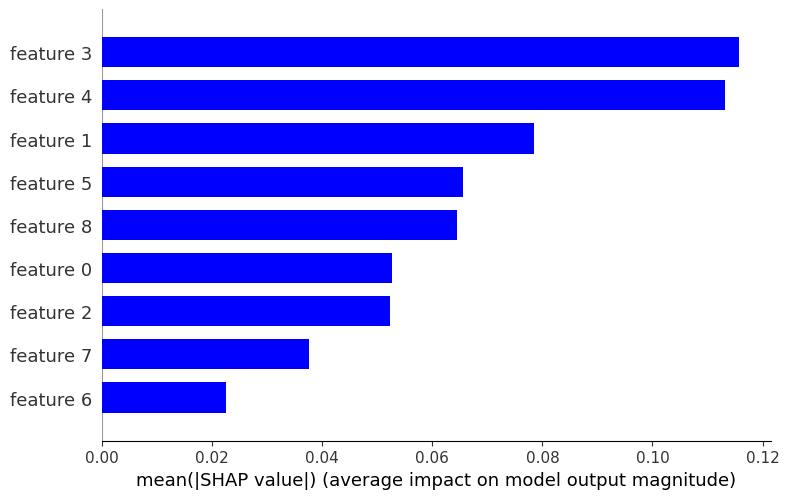

(13, 64, 9)


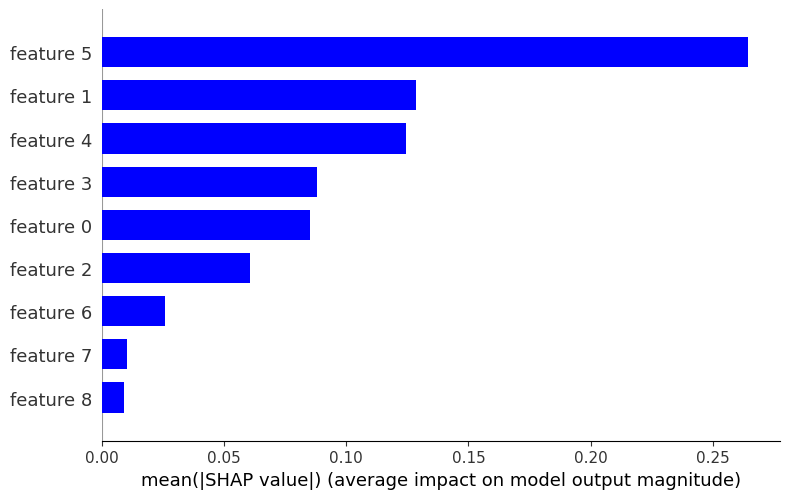

(13, 64, 9)


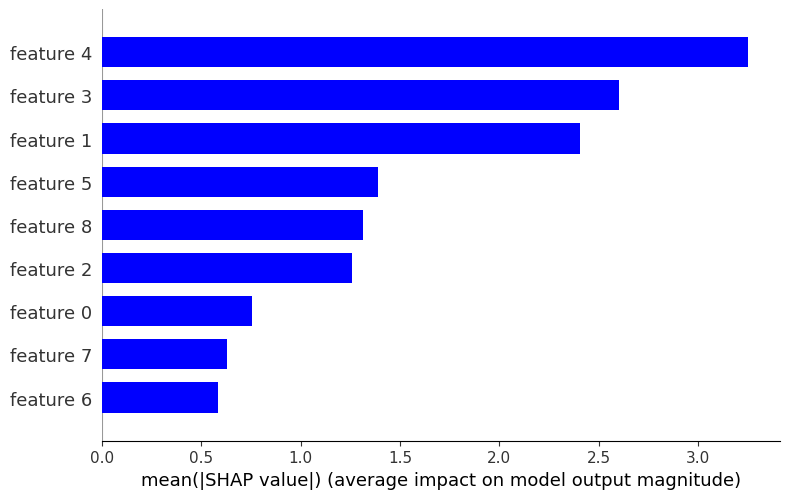

(13, 64, 9)


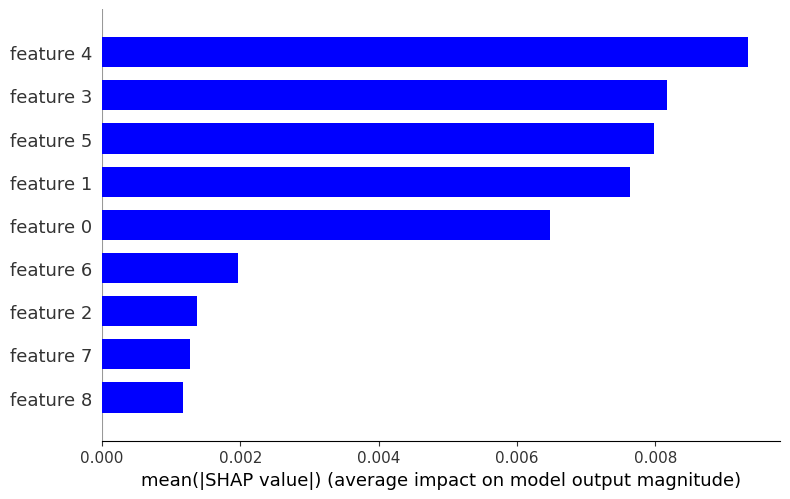

In [52]:
import shap


def plot_rank_feature_importance(shap_means):
    
    abs_shap_means = np.abs(shap_means)
    mean_abs_shap_means = np.mean(abs_shap_means, axis=0)
    rank_idx = np.argsort(mean_abs_shap_means)
    print('rank_idx', rank_idx)
    ranked_x_input_name = [x_input_name[i] for i in rank_idx]

    print('ranked_x_input_name', ranked_x_input_name)
    ranked_mean_abs_shap_means = mean_abs_shap_means[rank_idx]
    ranked_std_abs_shap_means = np.std(abs_shap_means, axis=0)[rank_idx]
    ranked_x_input_name = [x_input_name[i] for i in rank_idx]
    print(type(ranked_x_input_name))
    plt.barh(ranked_x_input_name, ranked_mean_abs_shap_means, xerr=ranked_std_abs_shap_means)
    # plt.barh(x_input_name, np.mean(abs_shap_means, axis=0), xerr=np.std(abs_shap_means, axis=0))
for _, model_name in enumerate(models):
    shape_values = np.array(shap_all[model_name])
    print(shape_values.shape)
    x_input_name = ['feature ' + str(i) for i in range(shape_values.shape[1])]
    shap_means = np.mean(shape_values, axis=0)

    # ax = shap.summary_plot(shap_means, features=np.abs(shap_means), feature_names=x_input_name, title=model_name)
    shap.summary_plot(shap_means, features=np.abs(shap_means), feature_names=x_input_name, plot_type='bar', color='blue', title=model_name)
    # plot_rank_feature_importance(shap_means)
    # plt.show()
    


(11, 64, 9)
(11, 64, 9)
(11, 64, 9)
(11, 64, 9)
(11, 64, 9)
(11, 64, 9)


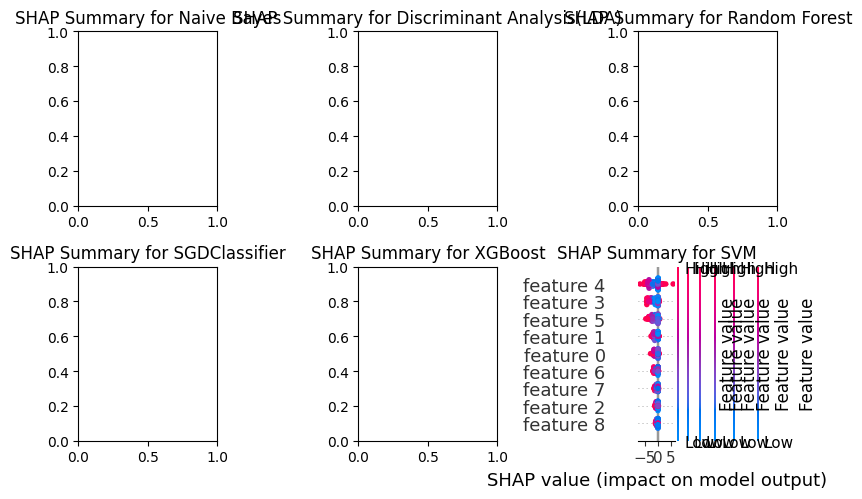

In [32]:
# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over models and plot SHAP summary plots
for count, model_name in enumerate(models):
    shape_values = np.array(shap_all[model_name])
    print(shape_values.shape)
    
    x_input_name = ['feature ' + str(i) for i in range(shape_values.shape[1])]
    shap_means = np.mean(shape_values, axis=0)
    
    ax = axs[count // 3, count % 3]  # Corrected indexing to ensure proper grid placement
    
    # Plot SHAP summary plot
    shap.summary_plot(shap_means, features=np.abs(shap_means), feature_names=x_input_name, show=False)
    

    # Set the title for the subplot
    ax.set_title(f'SHAP Summary for {model_name}')


plt.tight_layout()
plt.show()

In [57]:
import matplotlib.pyplot as plt
def plot_avg_auc(fprs, tprs, roc_aucs, title):
    mean_fpr = np.linspace(0, 1, 100)

    # Interpolate TPRs at these common FPR levels
    mean_tpr = np.zeros_like(mean_fpr)
    tpr_interpolated = []

    for i in range(len(fprs)):
        tpr_interp = np.interp(mean_fpr, fprs[i], tprs[i])
        tpr_interpolated.append(tpr_interp)
        
        
    # Calculate the mean TPR
    tpr_interpolated = np.array(tpr_interpolated)
    mean_tpr = tpr_interpolated.mean(axis=0)
    std_tpr = tpr_interpolated.std(axis=0)

    tpr_upper = np.minimum(mean_tpr + std_tpr, 1)
    tpr_lower = np.maximum(mean_tpr - std_tpr, 0)

    # Compute AUC
    mean_auc = np.mean(roc_aucs) # auc(mean_fpr, mean_tpr)
    std_auc = np.std(roc_aucs)
    plt.figure()
    plt.plot(mean_fpr, mean_tpr, lw=2, color='#000080', label='Mean ROC (AUC %0.2f ± %0.2f)' % (mean_auc, std_auc))
    plt.fill_between(mean_fpr, tpr_lower, tpr_upper, color='grey', alpha=0.3, label='±1 SD')
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.grid()
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.title(title)
    plt.legend(loc="lower right", frameon=False)

    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.show()